# Project-1, graphene nanoribbon with zigzag edges, 2014550025

In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()
%matplotlib inline

## set up the system

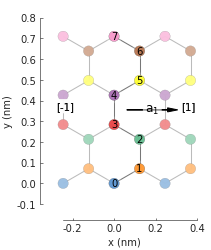

In [3]:
from math import sqrt

def graphene_nanoribbon():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[d*sqrt(3), 0])
    lat.add_sublattices(('0', [0, 0]),
                        ('1', [d*sqrt(3)/2,  d/2]),
                        ('2', [d*sqrt(3)/2,  d*3/2]),
                        ('3', [0,  d*2]),
                        ('4', [0,  d*3]),
                        ('5', [d*sqrt(3)/2,  d*7/2]),
                        ('6', [d*sqrt(3)/2,  d*9/2]),
                        ('7', [0,  d*5])
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        ([0,  0], '4', '5', t),
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        # between neighboring cells
        ([-1, 0], '0', '1', t),
        ([1, 0], '2', '3', t),
        ([-1, 0], '4', '5', t),
        ([1, 0], '6', '7', t)
    )
    return lat

lattice = graphene_nanoribbon()
lattice.plot()
plt.show()

[[ 0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-5.6+0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -5.6+0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j -2.8+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j]]


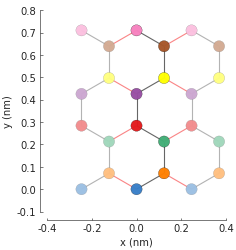

In [26]:
#from pybinding.repository import graphene
model = pb.Model(
    graphene_nanoribbon(),
    pb.translational_symmetry(a1=True, a2= False)
)
#model.onsite_map.plot_contourf()
#pb.pltutils.colorbar(label="U (eV)")
model.plot()
print(model.hamiltonian.todense())

## energy band structure

[-2.8000281e+00 -2.7999966e+00 -2.7999663e+00  2.3842108e-07
  7.1525574e-07  2.7999692e+00  2.8000000e+00  2.8000309e+00]


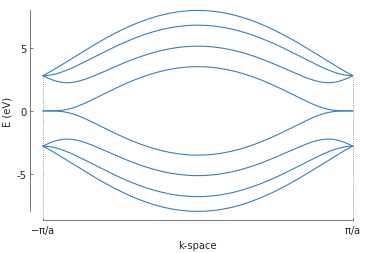

In [14]:
from math import sqrt, pi
solver = pb.solver.lapack(model)
bands = solver.calc_bands(-pi/graphene.a, pi/graphene.a) #in the first Brillouin zone
bands.plot(point_labels=[r"$-\pi / a$", r"$\pi / a$"])
print(solver.eigenvalues)
#plt.show()

## Addtion atom on the specific site in unit cell¶

[[ 0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-5.6+0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -5.6+0.j  5. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j -2.8+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j]]


/home/nosshark/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


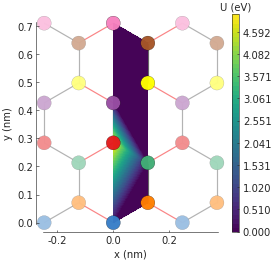

In [42]:
def addatom(delta_energy):
    #Break sublattice symmetry with opposite A and B onsite energy
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == '3'] += delta_energy
        return energy
    return potential

model3 = pb.Model(
    graphene_nanoribbon(),
    pb.translational_symmetry(a1=True, a2= False),
    addatom(5)
)
print(model3.hamiltonian.todense())

model3.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model3.plot()
#model.lattice.plot_vectors(position=[0.6, -0.25])

[-2.8000000e+00 -2.8000000e+00 -1.2536650e+00 -7.1525574e-07
 -2.3841733e-07  2.7999957e+00  2.7999969e+00  6.2536654e+00]


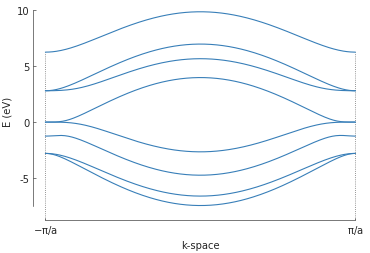

In [16]:
from pybinding.repository import graphene
from math import sqrt, pi
solver3 = pb.solver.lapack(model3)
bands3 = solver3.calc_bands(-pi/graphene.a, pi/graphene.a) #in the first Brillouin zone
bands3.plot(point_labels=[r"$-\pi / a$", r"$\pi / a$"])
#plt.show()
print(solver3.eigenvalues)

## Substitution atom in unit cell

[[ 0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-5.6+0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -5.6+0.j  5. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j -2.8+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j]]


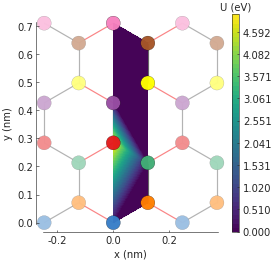

In [44]:
def substitute(delta_energy, fix_hopping):
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == '3'] += delta_energy
        return energy
    @pb.hopping_energy_modifier
    def hopping(energy, hop_id):
        energy[hop_id == '3'] *= fix_hopping
        return energy
    return potential, hopping

model3_h = pb.Model(
    graphene_nanoribbon(),
    pb.translational_symmetry(a1=True, a2= False),
    substitute(5,50)
)
print(model3_h.hamiltonian.todense())

model3_h.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model3_h.plot()
#model.lattice.plot_vectors(position=[0.6, -0.25])

[-2.8000281e+00 -2.7999966e+00 -2.7999663e+00  2.3842108e-07
  7.1525574e-07  2.7999692e+00  2.8000000e+00  2.8000309e+00]


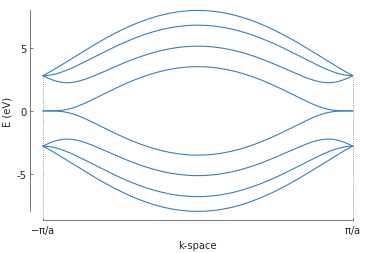

In [39]:
from pybinding.repository import graphene
from math import sqrt, pi
solver3_h = pb.solver.lapack(model3_h)
bands3_h = solver3_h.calc_bands(-pi/graphene.a, pi/graphene.a) #in the first Brillouin zone
bands3_h.plot(point_labels=[r"$-\pi / a$", r"$\pi / a$"])
#plt.show()
print(solver3_h.eigenvalues)

## Make vacancies

[[ 0. +0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j -2.8+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j -5.6+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -5.6+0.j  0. +0.j]]


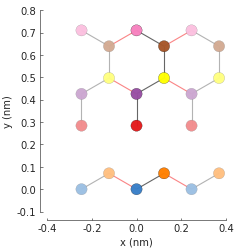

In [50]:
def vacancy(atom):
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id==atom] = False
        return state
    return modifier
model3_v = pb.Model(
    graphene_nanoribbon(),
    pb.translational_symmetry(a1=True, a2= False),
    vacancy('2')
)
print(model3_v.hamiltonian.todense())

#model3_v.onsite_map.plot_contourf()
#pb.pltutils.colorbar(label="U (eV)")
model3_v.plot()

[-2.8000195e+00 -2.7999759e+00 -4.3636941e-05  2.3841858e-07
  4.3636963e-05  2.7999783e+00  2.8000219e+00]


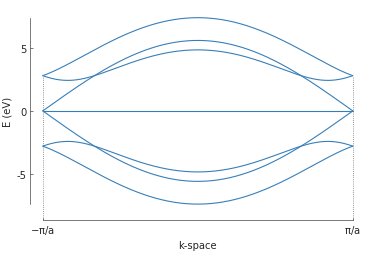

In [51]:
from pybinding.repository import graphene
from math import sqrt, pi
solver3_v = pb.solver.lapack(model3_v)
bands3_v = solver3_v.calc_bands(-pi/graphene.a, pi/graphene.a) #in the first Brillouin zone
bands3_v.plot(point_labels=[r"$-\pi / a$", r"$\pi / a$"])
#plt.show()
print(solver3_v.eigenvalues)

## cf.

[[ 1. +0.j  0. +0.j -2.8+0.j  0. +0.j]
 [ 0. +0.j  1. +0.j -5.6+0.j -2.8+0.j]
 [-2.8+0.j -5.6+0.j -1. +0.j  0. +0.j]
 [ 0. +0.j -2.8+0.j  0. +0.j -1. +0.j]]


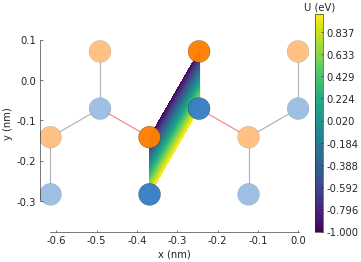

In [25]:
from pybinding.repository import graphene
def addatom(delta_energy):
    #Break sublattice symmetry with opposite A and B onsite energy
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == 'A'] += delta_energy
        energy[sub_id == 'B'] -= delta_energy
        return energy
    return potential

model = pb.Model(
    graphene.monolayer(),
    pb.primitive(a1=2, a2=2),
    pb.translational_symmetry(a1=True, a2= False),
    addatom(1)
)
#model.hamiltonian[1,1]=2
print(model.hamiltonian.todense())

model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model.plot()
#model.lattice.plot_vectors(position=[0.6, -0.25])

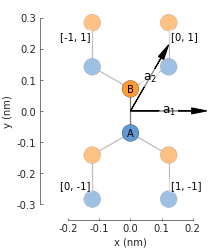

In [25]:
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

[[ 1. +0.j  0. +0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  1. +0.j  0. +0.j -5.6+0.j -2.8+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  1. +0.j  0. +0.j -5.6+0.j -2.8+0.j]
 [-2.8+0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -2.8+0.j -5.6+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -2.8+0.j  0. +0.j  0. +0.j  0. +0.j]]


/home/2014/2014550025/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


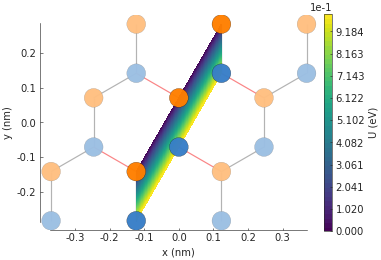

In [54]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(onsite=(1,0)),
    pb.primitive(a1=5, a2=3),
    #pb.rectangle(1.2),  # nm
    pb.translational_symmetry(a1=True, a2= False)
)
model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model.plot()
print(model.hamiltonian.todense())
#model.lattice.plot_vectors(position=[-0.6, 0.3])  # nm

In [ ]:
def vacancy(position, radius):
    @pb.site_state_modifier
    def f(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return f

model = pb.Model(
    ... # lattice, shape, etc.
    vacancy(position=[0, 0], radius=0.1)
)
